In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random
import shutil
import cv2
# Technically not necessary in newest versions of jupyter
%matplotlib inline

In [2]:
# opacity_source = 'C:\\Users\\personal\\Documents\\Python Scripts\\data science scripts\\covid19_diagnosis\\Lung_Opacity'
# pneumonia_source = 'C:\\Users\\personal\\Documents\\Python Scripts\\data science scripts\\covid19_diagnosis\\Viral Pneumonia'
# test_dest_opacity='C:\\Users\\personal\\Documents\\Python Scripts\\data science scripts\\covid19_diagnosis\\test\\lung_opacity'
# train_dest_opacity='C:\\Users\\personal\\Documents\\Python Scripts\\data science scripts\\covid19_diagnosis\\train\\lung_opacity'
# test_dest_pneumonia='C:\\Users\\personal\\Documents\\Python Scripts\\data science scripts\\covid19_diagnosis\\test\\viral_pneumonia'
# train_dest_pneumonia='C:\\Users\\personal\\Documents\\Python Scripts\\data science scripts\\covid19_diagnosis\\train\\viral_pneumonia'
# covid_source = 'C:\\Users\\personal\\Documents\\Python Scripts\\data science scripts\\covid19_diagnosis\\COVID'
# normal_source='C:\\Users\\personal\\Documents\\Python Scripts\\data science scripts\\covid19_diagnosis\\Normal'
# test_dest_covid='C:\\Users\\personal\\Documents\\Python Scripts\\data science scripts\\covid19_diagnosis\\test\\covid'
# train_dest_covid='C:\\Users\\personal\\Documents\\Python Scripts\\data science scripts\\covid19_diagnosis\\train\\covid'
# test_dest_normal='C:\\Users\\personal\\Documents\\Python Scripts\\data science scripts\\covid19_diagnosis\\test\\normal'
# train_dest_normal='C:\\Users\\personal\\Documents\\Python Scripts\\data science scripts\\covid19_diagnosis\\train\\normal'
# covid_files=os.listdir(covid_source)
# normal_files=os.listdir(normal_source)
# no_covid_files=len(covid_files)//5
# no_normal_files=len(normal_files)//5
# opacity_files=os.listdir(opacity_source)
# pneumonia_files=os.listdir(pneumonia_source)
# no_opacity_files=len(opacity_files)//5
# no_pneumonia_files=len(pneumonia_files)//5

In [3]:
# os.makedirs('test')
# os.makedirs('train')
# os.makedirs('test\\covid')
# os.makedirs('test\\normal')
# os.makedirs('train\\covid')
# os.makedirs('train\\normal')

In [4]:
# for file_name in random.sample(covid_files,no_covid_files):
#     shutil.move(os.path.join(covid_source,file_name),test_dest_covid)
# for file_name_2 in covid_files:
#     shutil.move(os.path.join(covid_source,file_name_2),train_dest_covid)

In [5]:
# for file_name in random.sample(normal_files,no_normal_files):
#     shutil.move(os.path.join(normal_source,file_name),test_dest_normal)
# for file_name in normal_files:
#     shutil.move(os.path.join(normal_source,file_name),train_dest_normal)

In [3]:
# for file_name in random.sample(opacity_files,no_opacity_files):
#     shutil.move(os.path.join(opacity_source,file_name),test_dest_opacity)
# for file_name_2 in opacity_files:
#     shutil.move(os.path.join(opacity_source,file_name_2),train_dest_opacity)

In [3]:
# for file_name in random.sample(pneumonia_files,no_pneumonia_files):
#     shutil.move(os.path.join(pneumonia_source,file_name),test_dest_pneumonia)
# for file_name_2 in pneumonia_files:
#     shutil.move(os.path.join(pneumonia_source,file_name_2),train_dest_pneumonia)

In [4]:
# os.rmdir('COVID')
# os.rmdir('Normal')
# os.rmdir('Lung_Opacity')
# os.rmdir('Viral Pneumonia')

In [2]:
test_path = 'test'
train_path = 'train'

In [3]:
image_shape = (299,299,3)

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [6]:
image_gen.flow_from_directory(train_path)

Found 16933 images belonging to 4 classes.


In [7]:
image_gen.flow_from_directory(test_path)

Found 4232 images belonging to 4 classes.


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [36]:
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(4))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 297, 297, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 148, 148, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 146, 146, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 78400)            

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

In [12]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [13]:
batch_size = 16

In [57]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 16933 images belonging to 4 classes.


In [58]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical',shuffle=False)

Found 4232 images belonging to 4 classes.


In [41]:
train_image_gen.class_indices

{'covid': 0, 'lung_opacity': 1, 'normal': 2, 'viral_pneumonia': 3}

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [59]:
results = model.fit_generator(train_image_gen,epochs=5,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/5
1059/1059 [==============================] - 2449s 2s/step - loss: 0.9456 - accuracy: 0.5976 - val_loss: 0.8139 - val_accuracy: 0.6656
Epoch 2/5
1059/1059 [==============================] - 2278s 2s/step - loss: 0.7842 - accuracy: 0.6806 - val_loss: 0.6978 - val_accuracy: 0.7077
Epoch 3/5
1059/1059 [==============================] - 2251s 2s/step - loss: 0.7242 - accuracy: 0.7097 - val_loss: 0.6430 - val_accuracy: 0.7389
Epoch 4/5
1059/1059 [==============================] - 2298s 2s/step - loss: 0.6786 - accuracy: 0.7350 - val_loss: 0.6020 - val_accuracy: 0.7552
Epoch 5/5
1059/1059 [==============================] - 2174s 2s/step - loss: 0.6449 - accuracy: 0.7442 - val_loss: 0.6047 - val_accuracy: 0.7557


In [60]:
from tensorflow.keras.models import load_model
model.save('covid_classifier2.h5')

In [21]:
#model=load_model('covid_classifier.h5')

In [61]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

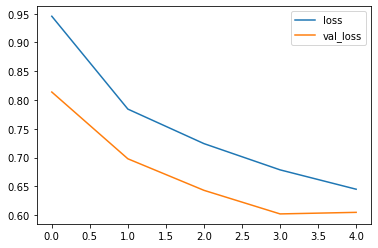

In [62]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

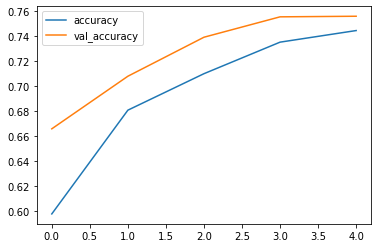

In [63]:
losses[['accuracy','val_accuracy']].plot()

In [64]:
model.evaluate_generator(test_image_gen)

[0.6066041588783264, 0.753308117389679]

In [65]:
from tensorflow.keras.preprocessing import image

In [66]:
pred_probabilities = model.predict_generator(test_image_gen)

In [67]:
pred_probabilities

array([[8.6248547e-01, 1.2320606e-01, 1.4245674e-02, 6.2730272e-05],
       [4.6538445e-01, 4.1539207e-01, 7.0290700e-02, 4.8932705e-02],
       [5.5524611e-01, 2.7667546e-01, 1.5210846e-01, 1.5969971e-02],
       ...,
       [9.8023215e-11, 1.4260813e-06, 5.2366879e-05, 9.9994624e-01],
       [5.0030557e-10, 1.6108988e-04, 9.4381314e-05, 9.9974447e-01],
       [5.6973746e-04, 2.5534106e-03, 1.9257009e-02, 9.7761989e-01]],
      dtype=float32)

In [68]:
test_image_gen.classes

array([0, 0, 0, ..., 3, 3, 3])

In [167]:
predictions = pred_probabilities > 0.4

In [168]:
predictions

array([[ True, False, False, False],
       [ True,  True, False, False],
       [ True, False, False, False],
       ...,
       [False, False, False,  True],
       [False, False, False,  True],
       [False, False, False,  True]])

In [169]:
pred_list=[]
for j in range(0,4232):
    for i in range(0,4):
        if predictions[j][i]==True:
            pred_list.append(i)

In [176]:
len(pred_list[:4232])

4232

In [99]:
len(test_image_gen.classes)

4232

In [129]:
predictions[1]

array([False, False, False, False])

In [71]:
from sklearn.metrics import classification_report,confusion_matrix

In [177]:
print(classification_report(test_image_gen.classes,pred_list[:4232]))

precision    recall  f1-score   support

           0       0.72      0.40      0.51       723
           1       0.68      0.70      0.69      1202
           2       0.70      0.86      0.77      2038
           3       0.88      0.42      0.57       269

    accuracy                           0.70      4232
   macro avg       0.75      0.59      0.63      4232
weighted avg       0.71      0.70      0.69      4232



In [173]:
confusion_matrix(test_image_gen.classes,pred_list[:4232])

array([[ 287,  155,  279,    2],
       [  43,  839,  320,    0],
       [  60,  222, 1743,   13],
       [   6,   18,  133,  112]], dtype=int64)